In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
from pandas import DataFrame

In [4]:
df = pd.read_csv('../../01_week/_RES/all_penguins_clean.csv', index_col=0)

### 1. Imputation

In [5]:
df.head(3)

,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex
studyName,,,,,,,,,,,,,,
PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE
PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE
PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,A_2,FEMALE


In [6]:
df.shape

(344, 14)

In [7]:
df.isna()

,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex
studyName,,,,,,,,,,,,,,
PAL0708,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PAL0708,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PAL0708,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PAL0708,False,False,False,False,False,False,False,False,True,True,True,True,False,True
PAL0708,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAL0910,False,False,False,False,False,False,False,False,True,True,True,True,False,True
PAL0910,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PAL0910,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

Sample Number           0
Species                 0
Region                  0
Island                  0
Stage                   0
Individual ID           0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Real ID                 0
Sex                    10
dtype: int64

In [9]:
df.isna().sum().loc['Body Mass (g)']

2

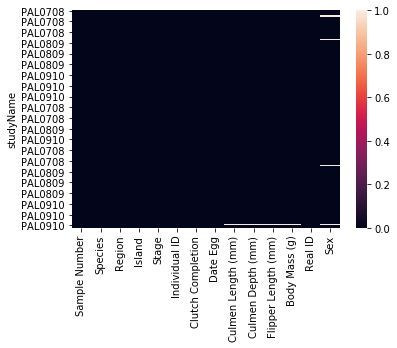

In [10]:
sns.heatmap(df.isna())

In [13]:
df['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [14]:
df['Sex'].fillna('MISSING')

studyName
PAL0708       MALE
PAL0708     FEMALE
PAL0708     FEMALE
PAL0708    MISSING
PAL0708     FEMALE
            ...   
PAL0910    MISSING
PAL0910     FEMALE
PAL0910       MALE
PAL0910     FEMALE
PAL0910       MALE
Name: Sex, Length: 344, dtype: object

In [15]:
df['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [16]:
df['Sex'].fillna('MISSING', inplace=True)
# alt: df['Sex_fixed'] = df['Sex'].fillna('MISSING') # creates a new column

In [17]:
df['Sex'].value_counts()

MALE       168
FEMALE     165
MISSING     10
.            1
Name: Sex, dtype: int64

In [18]:
df.fillna('MISSING')

,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex
studyName,,,,,,,,,,,,,,
PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181,3750,A_0,MALE
PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186,3800,A_1,FEMALE
PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18,195,3250,A_2,FEMALE
PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,MISSING,MISSING,MISSING,MISSING,A_3,MISSING
PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193,3450,A_4,FEMALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAL0910,120,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,MISSING,MISSING,MISSING,MISSING,G_339,MISSING
PAL0910,121,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215,4850,G_340,FEMALE
PAL0910,122,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222,5750,G_341,MALE


In [23]:
df.columns # use to fix typo-mistakes and copy directly

Index(['Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Real ID',
       'Sex'],
      dtype='object')

In [21]:
med = df['Flipper Length (mm)'].median() # when not normally distributed, median the more robust choice
df['Flipper Length (mm)'].fillna(med, inplace= True)

Other ideas:

* insert medians by category (median for females/males separately) use ```df.groupby().transform()```
* forward / backward fill / interpolation (time series)
* K-Nearest Neighbours (find the next most similar penguin)

### 2. Categories - One-Hot-Encoding

one categorical -> many binary columns

In [25]:
df['Sex']
# MALE = 0, FEMALE = 1, MISSING = 2 --> not recommended, works only well for binary

studyName
PAL0708       MALE
PAL0708     FEMALE
PAL0708     FEMALE
PAL0708    MISSING
PAL0708     FEMALE
            ...   
PAL0910    MISSING
PAL0910     FEMALE
PAL0910       MALE
PAL0910     FEMALE
PAL0910       MALE
Name: Sex, Length: 344, dtype: object

In [28]:
# dummy encoding ~ one-hot encoding
onehot = pd.get_dummies(df['Sex']) # --> returns df
onehot.head(3)

,.,FEMALE,MALE,MISSING
studyName,,,,
PAL0708,0,0,1,0
PAL0708,0,1,0,0
PAL0708,0,1,0,0


In [37]:
pd.concat([df, onehot], axis=1)
# concat adss either horizontally/vertically
# (axis= 0 - rows axis=1 - columns)

,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex,.,FEMALE,MALE,MISSING
studyName,,,,,,,,,,,,,,,,,,
PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE,0,0,1,0
PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE,0,1,0,0
PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,A_2,FEMALE,0,1,0,0
PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,197.0,NaN,A_3,MISSING,0,0,0,1
PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,A_4,FEMALE,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAL0910,120,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,197.0,NaN,G_339,MISSING,0,0,0,1
PAL0910,121,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,G_340,FEMALE,0,1,0,0
PAL0910,122,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,G_341,MALE,0,0,1,0


In [34]:
df.shape, onehot.shape

((344, 14), (344, 4))

In [38]:
pd.concat([df, onehot], axis=1)

,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Real ID,Sex,.,FEMALE,MALE,MISSING
studyName,,,,,,,,,,,,,,,,,,
PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,A_0,MALE,0,0,1,0
PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,A_1,FEMALE,0,1,0,0
PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,A_2,FEMALE,0,1,0,0
PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,197.0,NaN,A_3,MISSING,0,0,0,1
PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,A_4,FEMALE,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAL0910,120,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,197.0,NaN,G_339,MISSING,0,0,0,1
PAL0910,121,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,G_340,FEMALE,0,1,0,0
PAL0910,122,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,G_341,MALE,0,0,1,0


In [40]:
df2 = pd.concat([df, onehot], axis=1)
df2.head(10)
# pro tip: leave out 1 column, because it is redundant
del df2['.']

### 3. Binning

Scalar -> Category

In [43]:
df['Body Mass (g)'].fillna(3000.0, inplace=True)

In [44]:
df['Body Mass (g)']

studyName
PAL0708    3750.0
PAL0708    3800.0
PAL0708    3250.0
PAL0708    3000.0
PAL0708    3450.0
            ...  
PAL0910    3000.0
PAL0910    4850.0
PAL0910    5750.0
PAL0910    5200.0
PAL0910    5400.0
Name: Body Mass (g), Length: 344, dtype: float64

In [45]:
pd.qcut(df['Body Mass (g)'], q=3)
# input of qcut is column and a number of bins to give you quantiles

studyName
PAL0708    (3700.0, 4533.333]
PAL0708    (3700.0, 4533.333]
PAL0708    (2699.999, 3700.0]
PAL0708    (2699.999, 3700.0]
PAL0708    (2699.999, 3700.0]
                  ...        
PAL0910    (2699.999, 3700.0]
PAL0910    (4533.333, 6300.0]
PAL0910    (4533.333, 6300.0]
PAL0910    (4533.333, 6300.0]
PAL0910    (4533.333, 6300.0]
Name: Body Mass (g), Length: 344, dtype: category
Categories (3, interval[float64]): [(2699.999, 3700.0] < (3700.0, 4533.333] < (4533.333, 6300.0]]

In [46]:
pd.qcut(df['Body Mass (g)'], q=3, labels=['light', 'medium', 'heavy'])

studyName
PAL0708    medium
PAL0708    medium
PAL0708     light
PAL0708     light
PAL0708     light
            ...  
PAL0910     light
PAL0910     heavy
PAL0910     heavy
PAL0910     heavy
PAL0910     heavy
Name: Body Mass (g), Length: 344, dtype: category
Categories (3, object): [light < medium < heavy]

In [47]:
df['weight_cat'] = pd.qcut(df['Body Mass (g)'], q=3, labels=['light', 'medium', 'heavy'])
df['weight_cat'].head(3)

studyName
PAL0708    medium
PAL0708    medium
PAL0708     light
Name: weight_cat, dtype: category
Categories (3, object): [light < medium < heavy]

In [ ]:
# next step: one-hot encode -> 3 binary columns

In [ ]:
# alternative: pd.cut(...) # bins of equal width

### 4. Normalization

Change the range and/or distribution of values.

Examples:

* log-scale
* rescale to 0.0 .. 1.0
* rescale to standard normal distribution

In [49]:
# log normalization
np.log(df['Body Mass (g)'])

studyName
PAL0708    8.229511
PAL0708    8.242756
PAL0708    8.086410
PAL0708    8.006368
PAL0708    8.146130
             ...   
PAL0910    8.006368
PAL0910    8.486734
PAL0910    8.656955
PAL0910    8.556414
PAL0910    8.594154
Name: Body Mass (g), Length: 344, dtype: float64

In [50]:
# log normalization
# useful when data stretches over many orders of magnitude
# when data is nor normally distributed
# (usually done with countable things)
# does not work with negative values

df['log_mass'] = np.log(df['Body Mass (g)'])
df['log_mass'].head(3)

studyName
PAL0708    8.229511
PAL0708    8.242756
PAL0708    8.086410
Name: log_mass, dtype: float64

In [51]:
df['Body Mass (g)']

studyName
PAL0708    3750.0
PAL0708    3800.0
PAL0708    3250.0
PAL0708    3000.0
PAL0708    3450.0
            ...  
PAL0910    3000.0
PAL0910    4850.0
PAL0910    5750.0
PAL0910    5200.0
PAL0910    5400.0
Name: Body Mass (g), Length: 344, dtype: float64

#### Min Max Scaling

lightest penguin: 0.0
heaviest penguin: 1.0

In [52]:
# 1) calculate the range
df['Body Mass (g)'].min()

2700.0

In [53]:
df['Body Mass (g)'].max()

6300.0

In [55]:
mass_range = df['Body Mass (g)'].max() - df['Body Mass (g)'].min()
mass_range

3600.0

In [58]:
df['mass_scaled'] = (df['Body Mass (g)'] - df['Body Mass (g)'].min()) / mass_range
df['mass_scaled']

studyName
PAL0708    0.291667
PAL0708    0.305556
PAL0708    0.152778
PAL0708    0.083333
PAL0708    0.208333
             ...   
PAL0910    0.083333
PAL0910    0.597222
PAL0910    0.847222
PAL0910    0.694444
PAL0910    0.750000
Name: mass_scaled, Length: 344, dtype: float64

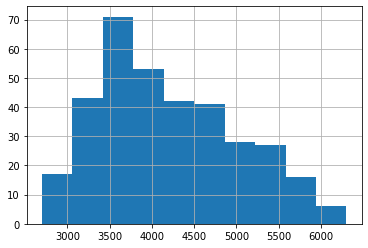

In [60]:
df['Body Mass (g)'].hist()

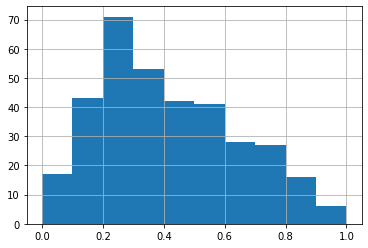

In [61]:
df['mass_scaled'].hist()

In [63]:
#!! distribution does not change
# LogReg computation is more efficient

In [65]:
# also see: MinMaxScaler in scikit
# also see: OneHotEncoder in scikit
# also see: Column Transformer in scikit